In [53]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "../../data/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)

df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [54]:
# Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [55]:
# Check Null Value
df.isnull().sum()

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

In [56]:
# Cleaning Data

df_cleaned = df.drop(columns=['risk_classification'])
df_cleaned = df_cleaned.drop(columns=['timestamp'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vehicle_gps_latitude             32065 non-null  float64
 1   vehicle_gps_longitude            32065 non-null  float64
 2   fuel_consumption_rate            32065 non-null  float64
 3   eta_variation_hours              32065 non-null  float64
 4   traffic_congestion_level         32065 non-null  float64
 5   warehouse_inventory_level        32065 non-null  float64
 6   loading_unloading_time           32065 non-null  float64
 7   handling_equipment_availability  32065 non-null  float64
 8   order_fulfillment_status         32065 non-null  float64
 9   weather_condition_severity       32065 non-null  float64
 10  port_congestion_level            32065 non-null  float64
 11  shipping_costs                   32065 non-null  float64
 12  supplier_reliabili

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(labels=['delivery_time_deviation'], axis=1), df_cleaned['delivery_time_deviation'], test_size=0.3, random_state=0)

X_train

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,lead_time_days,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability
22148,40.191123,-107.794701,11.126528,4.999995,9.929538,387.123036,0.523951,0.424196,0.751853,0.656388,...,1.004503,4296.606237,1.986125,0.937742,8.776832,0.530512,0.431139,0.146144,0.987360,0.999328
1426,32.879478,-84.563606,5.075625,4.962708,0.506096,937.710010,1.249453,0.085398,0.999993,0.003175,...,12.621142,209.329437,11.242937,0.001118,9.506792,1.307917,0.977965,0.928197,0.992467,0.720942
16366,30.050949,-119.575796,5.009342,4.999999,3.044938,167.382699,0.501240,0.570177,0.611749,0.341464,...,13.531110,2498.995308,19.570840,0.116233,9.898995,0.513676,0.027682,0.234574,0.974383,0.997277
18201,42.727063,-77.712917,14.287770,4.999815,9.998383,306.304039,3.878252,0.072390,0.496271,0.000008,...,1.000225,9143.662011,-7.686795,0.042560,9.932480,4.895655,0.997013,0.967897,0.994234,0.993796
22300,34.971890,-93.474820,5.190079,4.814212,5.302568,164.278464,3.212487,0.002572,0.998654,0.579612,...,2.289792,9516.600123,-9.831345,0.173975,9.154342,0.581105,0.942428,0.848513,0.099525,0.025961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30.073894,-100.326770,5.023528,3.925156,2.584678,10.885167,3.398170,0.009223,0.933658,0.503052,...,10.015251,7831.523794,-9.504557,0.371406,8.111863,3.273875,0.711968,0.998830,0.998718,0.397270
19648,33.582749,-106.408884,5.557953,4.643697,0.511718,594.190348,3.344864,0.005165,0.966181,0.641019,...,3.198737,1366.274454,16.405479,0.059351,0.747023,1.344958,0.624349,0.948619,0.992812,0.831732
9845,49.121952,-80.093265,5.000228,-1.995098,0.185140,22.776248,2.143499,0.033726,0.988797,0.967263,...,1.501982,2155.344639,-9.164470,0.057424,9.987638,4.353665,0.714687,0.999803,0.997989,0.706513
10799,42.859278,-119.529690,5.007086,4.851125,0.901775,317.943212,4.274820,0.220803,0.911104,0.527425,...,1.053709,9196.289833,5.183768,0.201006,1.870753,4.982874,0.982816,0.996461,0.999957,0.679389


In [58]:
y_train

22148    9.394624
1426     9.927444
16366   -1.923129
18201    2.847156
22300    6.716483
           ...   
13123    9.826135
19648    2.773598
9845     9.998171
10799    9.999592
2732     1.386703
Name: delivery_time_deviation, Length: 22445, dtype: float64

In [59]:
#Feature Selection
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.        , 0.00544657, 0.        , 0.        , 0.01599235,
       0.        , 0.00014164, 0.        , 0.00055161, 0.        ,
       0.        , 0.        , 0.00131459, 0.        , 0.00255814,
       0.01135905, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00235836, 0.00884065])

In [60]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

traffic_congestion_level           0.015992
iot_temperature                    0.011359
delay_probability                  0.008841
vehicle_gps_longitude              0.005447
historical_demand                  0.002558
disruption_likelihood_score        0.002358
supplier_reliability_score         0.001315
order_fulfillment_status           0.000552
loading_unloading_time             0.000142
vehicle_gps_latitude               0.000000
fuel_consumption_rate              0.000000
warehouse_inventory_level          0.000000
eta_variation_hours                0.000000
port_congestion_level              0.000000
handling_equipment_availability    0.000000
lead_time_days                     0.000000
shipping_costs                     0.000000
weather_condition_severity         0.000000
cargo_condition_status             0.000000
customs_clearance_time             0.000000
route_risk_level                   0.000000
fatigue_monitoring_score           0.000000
driver_behavior_score           

<Axes: >

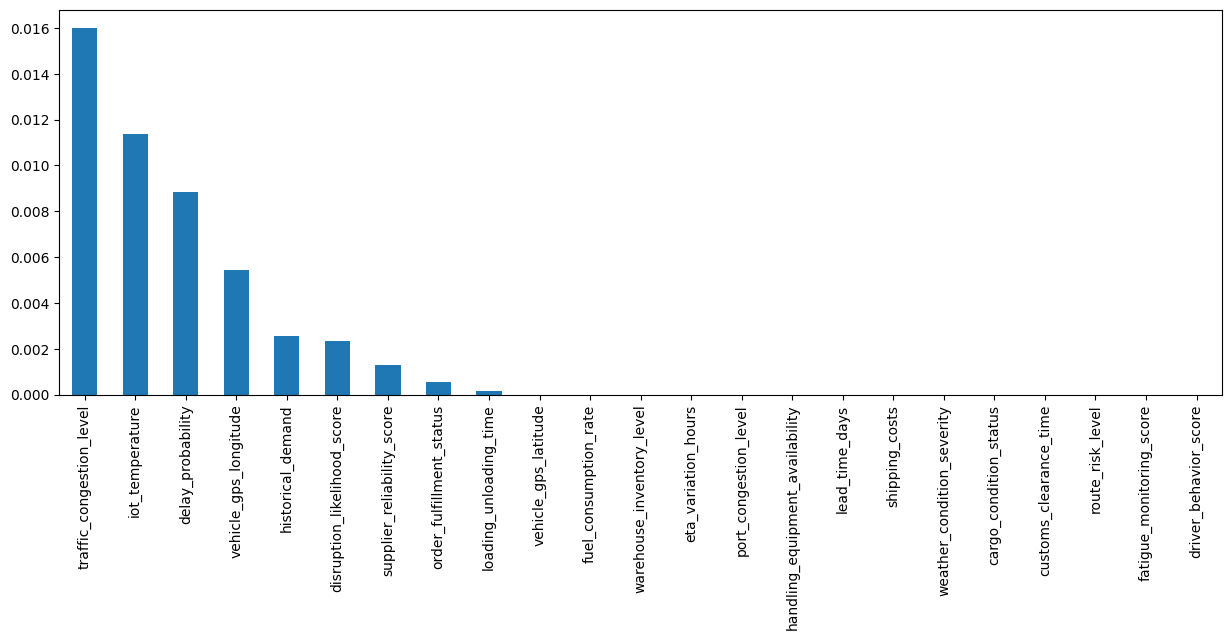

In [61]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [62]:
# @title 1st option - build from scratch
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # # Add a column of ones to X to account for the intercept
        # X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # # Calculate coefficients using the closed-form solution
        # self.__coef_ = np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), np.dot(X_b.T, y))

        # Calculate coefficients using the closed-form solution
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        # return np.dot(X, self.__coef_[1:]) + self.__coef_[0]
        return np.dot(X, self.coef_) + self.intercept_

In [64]:
from sklearn.model_selection import train_test_split
#Prepare Data
X = df_cleaned['traffic_congestion_level'].to_numpy().reshape(-1, 1)
y = df_cleaned['delivery_time_deviation'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin_reg_scratch = LinearRegressionScratch() # Import and initialize scikit-learn class for linear regression models
lin_reg_scratch.fit(X_train, y_train) # Train regression model

# Print model parameters
print("Coefficient (slope):", lin_reg_scratch.coef_)
print("Intercept:", lin_reg_scratch.intercept_)

y_pred = lin_reg_scratch.predict(X_test)
print(y_pred)

Coefficient (slope): [0.69207557]
Intercept: 1.7416800311947547
[5.56442195 7.27306762 3.72363772 ... 4.76236793 1.92815011 1.88008846]


<function matplotlib.pyplot.show(close=None, block=None)>

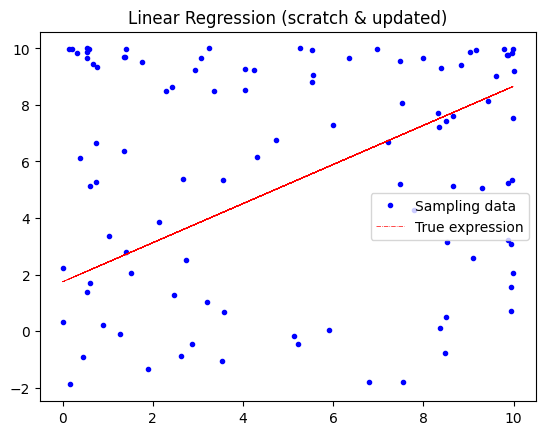

In [70]:
import matplotlib.pyplot as plt

plt.plot(X_test[:100], y_test[:100], "b.", label='Sampling data')
plt.plot(X_test[:100], y_pred[:100], "r-.", label='True expression', linewidth=0.5)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scratch & updated)')
plt.legend()
plt.show